In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr_run')

# Add the root directory of this repository
sys.path.append('../..')

from dchisq import DChiSq

In [9]:
import mpmath as mp

In [10]:
from scipy.special import binom

In [11]:
3125000/50

62500.0

In [13]:
# No scaling

n = np.linspace(125, 10000, 10)
p = 250
S = np.linspace(5, 125, 25)

# Keep sigma and gamma squared equal to each other
sigma_sq = 1
gamma_sq = 0.1

for i1, n_ in enumerate(n):
    
    F = np.linspace(0, 2 * np.log(n_), 100)
    
    # True model support sizes
    for i2, S_ in enumerate(S):
        
        for i3, F_ in enumerate(F):

            for i4, T in enumerate(np.arange(1, p/2)):
                
                t0 = time.time()
                dx2 = DChiSq(gamma_sq, sigma_sq, n_ - T, T)
                
                DeltaF = F_ * (S_ - T)
                # Calculate the CDF
                
                p = dx2.nCDF(DeltaF)
                print(time.time() - t0)
                
            

0
0.5514082908630371
0
0.612250566482544
0
0.4869523048400879
0
0.5816953182220459
0
0.46707844734191895
0
0.5913691520690918
0
0.4451315402984619
0
0.5619173049926758
0
0.42598628997802734
0
0.5453579425811768
0
0.4086625576019287
0
0.5039141178131104
0
0.39847874641418457
0
0.4904654026031494
0
0.38356685638427734
0
0.4612009525299072
0
0.3602776527404785
0
0.43084001541137695
0
0.3389127254486084
0
0.41242527961730957


KeyboardInterrupt: 

In [14]:
# Some sanity checks. Do the error probabilities even work out to be tangible numbers?

dx2 = DChiSq(0.1, 1, 100, 25)

In [19]:
S_ = 35
F_ = np.log(100)
n_ = 125
p = 125

for i4, T in enumerate(np.linspace(5, 50, 10, dtype=int)):

    t0 = time.time()
    dx2 = DChiSq(gamma_sq, sigma_sq, n_ - T, T)

    DeltaF = F_ * (S_ - T)
    # Calculate the CDF

    print(dx2.nCDF(DeltaF))


1.0
1.0
1.0
1.0
1.0
1.0
0.9999882509722628
0.8256098596996253
0.1689130781104755
0.009434477103555827


In [ ]:
# Get some feel for what the F function looks like


In [20]:
from scipy import stats

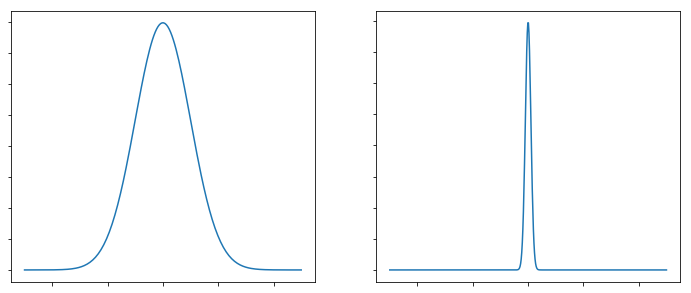

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].plot(np.linspace(-5, 5, 200), stats.norm.pdf(np.linspace(-5, 5, 200)))
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])

ax[1].plot(np.linspace(-50, 50, 500), stats.norm.pdf(np.linspace(-50, 50, 500)))
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

plt.savefig('measure_concentration.png')